In [6]:
from glob import glob
import pandas as pd

In [74]:
def parse_fname(fname: str) -> dict:
    parsed = dict()
    options = fname.split('@')[1]
    options = options.split('.csv')[0]
    for c in options.split(','):
        k, val = c.split('_')
        parsed[k] = val
        
    score = fname.split('results\\')[1].split('@')[0].split('_')[0]
    return parsed, score

records = list()
y = list()
for fname in glob('results/*.csv'):
    opts, score = parse_fname(fname)
    records.append(opts)
    y.append(float(score))

df = pd.DataFrame.from_records(records)
X = pd.get_dummies(df, columns=['seg', 'reg'], drop_first=False)
X.weights = X.weights.apply(lambda r: r == 'true')

In [75]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X, y)
list(sorted(zip(X.columns, clf.coef_), key=lambda x: -abs(x[1])))

[('reg_lasso', -0.14172222222222242),
 ('reg_ridge', 0.07452777777777754),
 ('reg_linear', 0.06719444444444424),
 ('seg_felzenszwalb', -0.02177777777777791),
 ('seg_quickshift', 0.021777777777777688),
 ('weights', 0.0008888888888888002),
 ('n', 0.000241190476190476),
 ('sel', 8.326672684688674e-17)]

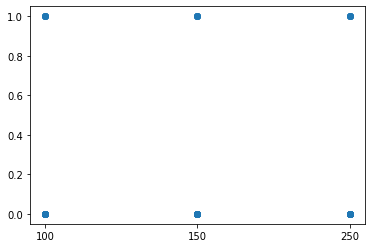

In [76]:
import matplotlib.pyplot as plt

plt.scatter(X.n, X.reg_lasso)

12


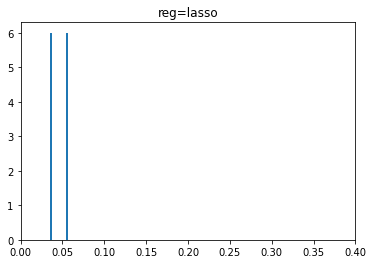

12


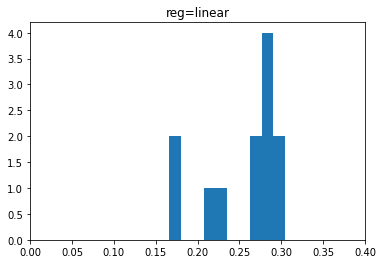

12


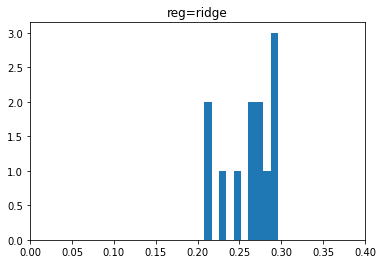

In [98]:
for n,grp in df.assign(y=y).groupby('reg'):
    print(len(grp))
    plt.hist(grp.y)
    plt.title('reg=%s' % n)
    plt.xlim(0, 0.4)
    plt.show()